## Supergusto kodiranje

Supergusto kodiranje je kvantni komunikacioni protokol u kojem se **dva klasična bita** mogu poslati prenosom samo **jednog kubita**, pod uslovom da pošiljalac i primalac dele spleteni par kubita.  
Ana kodira svoju poruku primenom jedne od četiri moguće operacije na svom kubitu pre nego što ga pošalje Bobanu.  Boban zatim vrši merenje u Belovoj bazi nad oba kubita, čime  dobija dvobitnu poruku.  

Ovim pristupom omogućava se prenos dve klasične informacije pomoću samo jednog kubita, uz preduslov da je upletenost unapred uspostavljena.

![supergustinsko kodiranje](images/superdense-coding.png)

### Zadatak
Ana želi da Bobanu pošalje ključ od 8 slučajno generisanih bitova koristeći protokol supergustog kodiranja. Napisati program koji će Ani i Bobanu omogućiti da razmene ključ.

### Očekivani rezultat

Program treba da nacrta kolo za svaki par bitova, a po završetku prenosa da prikaže:
- ceo ključ koji je Ana poslala,  
- ključ koji je Boban primio,  
- informaciju da li je prenos bio uspešan ili neuspešan.

### Eksperimenti

Izmenite program tako da kolo bude generalizovano za proizvoljan broj parova kubita (npr. 4, 8, 16 ...), čime se omogućava paralelni prenos podataka.


Circuit for bit pair [1, 0]:


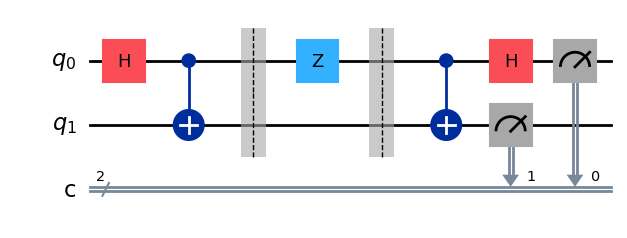

Circuit for bit pair [1, 0]:


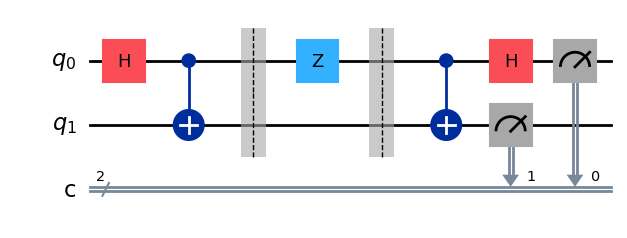

Circuit for bit pair [1, 0]:


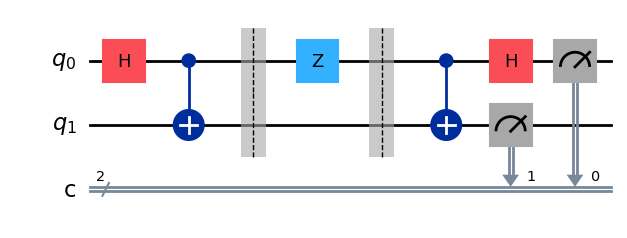

Circuit for bit pair [1, 1]:


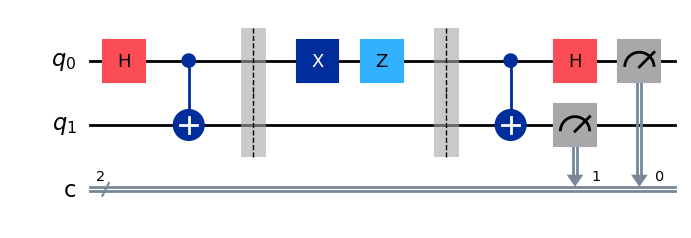

Alice sent:     10101011
Bob received:   10101011
Transmission OK: keys match.


In [1]:
from IPython.display import display

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import random

def bell_pair(qc, a, b):
    """Create a Bell pair between qubits a (Alice) and b (Bob)."""
    qc.h(a)
    qc.cx(a, b)
    return qc

def encode(qc, a, b0, b1):
    """Alice encodes her two classical bits onto her qubit."""
    qc.barrier()
    if (b0, b1) == (0, 1):
        qc.x(a)
    elif (b0, b1) == (1, 0):
        qc.z(a)
    elif (b0, b1) == (1, 1):
        qc.x(a)
        qc.z(a)
    qc.barrier()
    return qc

def decode(qc, a, b):
    """Bob decodes to recover Alice’s two classical bits."""
    qc.cx(a, b)
    qc.h(a)
    return qc

# ------------------------------------------------
#                main program
# ------------------------------------------------

# Alice creates an 8-bit random key
alice_bits = [random.randint(0, 1) for _ in range(8)]

n = 2         # number of qubits in the transmission line
bob_bits = [] # bits Bob receives
simulator = AerSimulator()

# loop: slice the key into bit pairs
# and send them over the 2-qubit circuit
for i in range(0, len(alice_bits), n):
    qc = QuantumCircuit(n, n)
    bitpair = alice_bits[i:i+n]
    
    # Alice encodes
    qc = bell_pair(qc, 0, 1)
    qc = encode(qc, 0, bitpair[0],bitpair[1])
 
    # ------- transmission lines -------
    
    # Bob decodes
    qc = decode(qc, 0, 1)
    qc.measure([0, 1], [0, 1])
    
    print(f"Circuit for bit pair {bitpair}:")
    display(circuit_drawer(qc, output="mpl"))
        
    result = simulator.run(qc, shots=1).result()
    counts = result.get_counts(qc)
    
    # Add the received pair into Bob's bitstring while 
    # reversing the bit order per Qiskit’s convention
    for key in counts:
        bob_bits.extend(int(b) for b in key[::-1])
    
# --- display results ---
print("Alice sent:    ", "".join(map(str, alice_bits)))
print("Bob received:  ", "".join(map(str, bob_bits)))

if bob_bits == alice_bits:
    print("Transmission OK: keys match.")
else:
    print("Transmission FAILED: keys differ.")